In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#Problem 1 Understanding the content of the competition

### What kind of company is Home Credit?

Home Credit is a company whose purpose is to broaden financial inclusion to the unbanked population i.e. normal people without much financial credit. Founded in Czech Republic, Home Credit strive to build model that utilize other data - transactional operations - to predict repayability of customer.

### What is expected in this competition?

In this competition, we will have access to Home Credits data in order to build model to predict repayment abilities depends on their informations.

### What are the benefits companies can gain by predicting this?

The company will have access to various ideas, models to improve their company


#Problem 2

In [ ]:
df = pd.read_csv('application_train.csv')

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25233 entries, 0 to 25232
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    float64
 18  DAYS_EMPLOYED            

In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,25233.000000,25233.000000,25233.000000,2.523300e+04,2.523300e+04,25233.000000,2.521500e+04,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,8552.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,11070.000000,2.516500e+04,20270.000000,12458.000000,10529.000000,12923.000000,8445.000000,7549.000000,11835.000000,12565.000000,12733.000000,...,12565.000000,12733.000000,8122.000000,10259.000000,7946.000000,12532.000000,7693.000000,11375.000000,13066.000000,25144.000000,25144.000000,25144.000000,25144.000000,25231.000000,25232.000000,25232.000000,25232.000000,25232.00000,25232.000000,25232.000000,25232.000000,25232.000000,25232.0,25232.000000,25232.0,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,25232.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000,21848.000000
mean,114703.161217,0.079895,0.416756,1.730624e+05,5.993395e+05,27125.203008,5.388250e+05,0.020752,-16018.744531,63342.614815,-4963.774017,-2987.304772,12.077760,0.999960,0.821100,0.201807,0.997979,0.278258,0.056198,2.159282,2.049342,2.029130,12.066741,0.017081,0.051522,0.039751,0.081959,0.233156,0.179534,0.503455,5.150376e-01,0.511987,0.117117,0.089197,0.978761,0.750296,0.044187,0.077430,0.150849,0.224176,...,0.150441,0.223743,0.231514,0.067526,0.101612,0.108388,0.008707,0.028053,0.101697,1.425350,0.144408,1.409084,0.100422,-963.349649,0.000040,0.711993,0.000198,0.01514,0.086438,0.000119,0.079899,0.003844,0.0,0.004439,0.0,0.003210,0.002655,0.000872,0.010899,0.000277,0.007768,0.000713,0.000594,0.000476,0.007186,0.007461,0.033138,0.270414,0.263731,1.890471
std,8480.348229,0.271137,0.722229,7.421797e+05,4.018626e+05,14684.877684,3.694167e+05,0.013786,4356.543108,140900.258384,3523.386098,1510.845426,11.901062,0.006295,0.383276,0.401357,0.044914,0.448150,0.230309,0.907144,0.507467,0.502287,3.234507,0.129578,0.221064,0.195378,0.274308,0.422849,0.383806,0.210730,1.902118e-01,0.194292,0.107423,0.083674,0.049388,0.113362,0.077795,0.133394,0.100389,0.144203,...,0.100730,0.144670,0.160495,0.081076,0.094437,0.110641,0.046997,0.069578,0.105513,2.320087,0.446860,2.301536,0.363458,826.037623,0.006295,0.452843,0.014076,0.12211,0.281015,0.010904,0.271141,0.061885,0.0,0.066478,0.0,0.056569,0.051463,0.029516,0.103829,0.016654,0.087795,0.026700,0.024375,0.021803,0.086078,0.111125,0.197249,0.938743,0.613782,

In [ ]:
avail = df.isnull().sum()
pct = (avail / df.isnull().count())

avail_pct = pd.concat([avail, pct], axis=1, keys=['total', 'percentage']).sort_values('percentage', ascending=False)
avail_pct

,total,percentage
COMMONAREA_MODE,17684,0.700828
COMMONAREA_AVG,17684,0.700828
COMMONAREA_MEDI,17684,0.700828
NONLIVINGAPARTMENTS_MODE,17540,0.695121
NONLIVINGAPARTMENTS_AVG,17540,0.695121
...,...,...
AMT_ANNUITY,0,0.000000
NAME_INCOME_TYPE,0,0.000000
NAME_EDUCATION_TYPE,0,0.000000
TARGET,0,0.000000


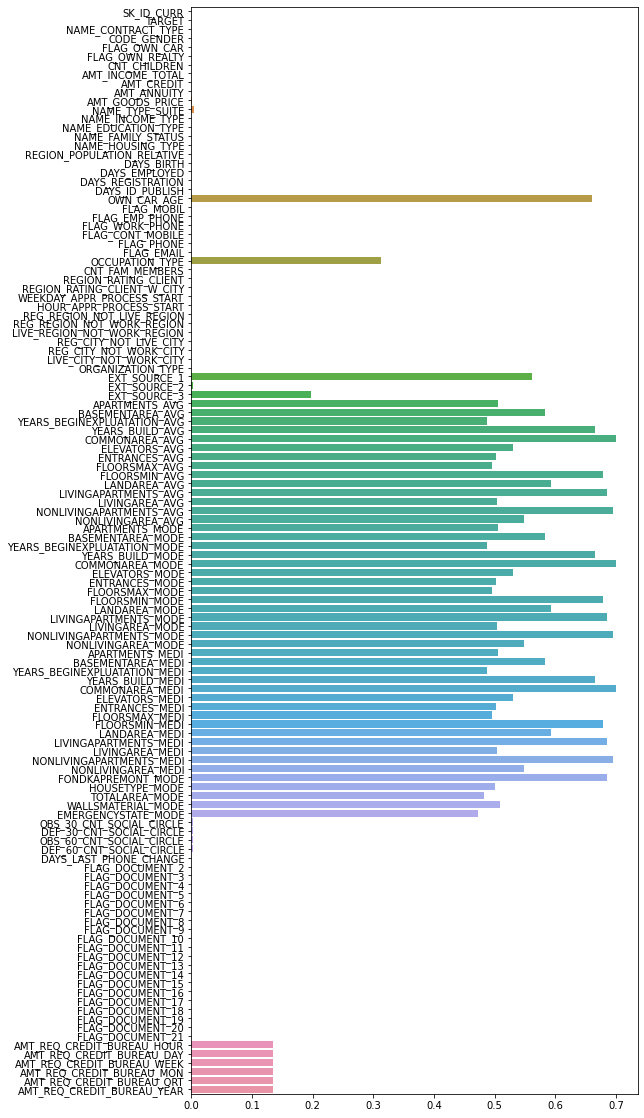

In [ ]:
plt.subplots(figsize=(8, 20))
sns.barplot(x=pct, y=pct.index)

# Problem 3 Defining issues

Much like previous assignments, we would like to examine the data statistics and distribution.

Then, we can examine the correlation of data to target variable TARGET

#Problem 4

In [ ]:
count_by_target = df.groupby('TARGET').count()
count_by_target


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23217,23217,23217,23217,23217,23217,23217,23217,23217,23200,23118,23217,23217,23216,23216,23216,23216,23216,23216,23216,7921,23216,23216,23216,23216,23216,23216,15836,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,...,7395,11669,7158,10590,7384,11744,12167,11551,12381,23132,23132,23132,23132,23215,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,23216,20181,20181,20181,20181,20181,20181
1,2016,2016,2016,2016,2016,2016,2016,2016,2016,2015,2012,2016,2016,2016,2016,2016,2016,2016,2016,2016,631,2016,2016,2016,2016,2016,2016,1509,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,551,863,535,785,552,871,899,853,922,2012,2012,2012,2012,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,1667,1667,1667,1667,1667,1667


## Distribution of TARGET

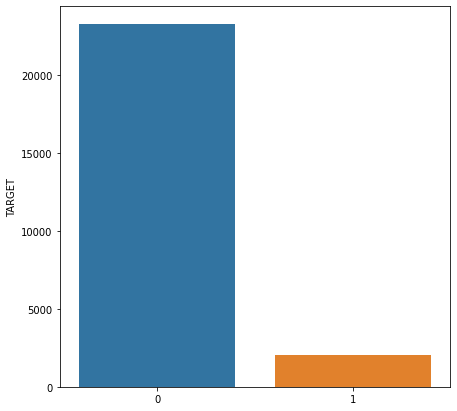

In [ ]:
count_target = df['TARGET'].value_counts()
plt.figure(figsize=(7, 7))
sns.barplot(y=count_target, x=count_target.index)

We can see that the amount of client with payment difficulties ( TARGET = 1 ) is significantly smaller than the rest.

In [ ]:
def plotGraph(f):
  count_target = df[f].value_counts()
  count_target1 = df.loc[df['TARGET'] == 1,f].value_counts()

  p, ax = plt.subplots(1, 2, figsize=(16, 10))
  sns.barplot(y=count_target, x=count_target.index, ax=ax[0])
  sns.barplot(y=count_target1, x=count_target1.index, ax=ax[1])
  plt.ylabel("Percent of target = 1")

## NAME_CONTRACT_TYPE

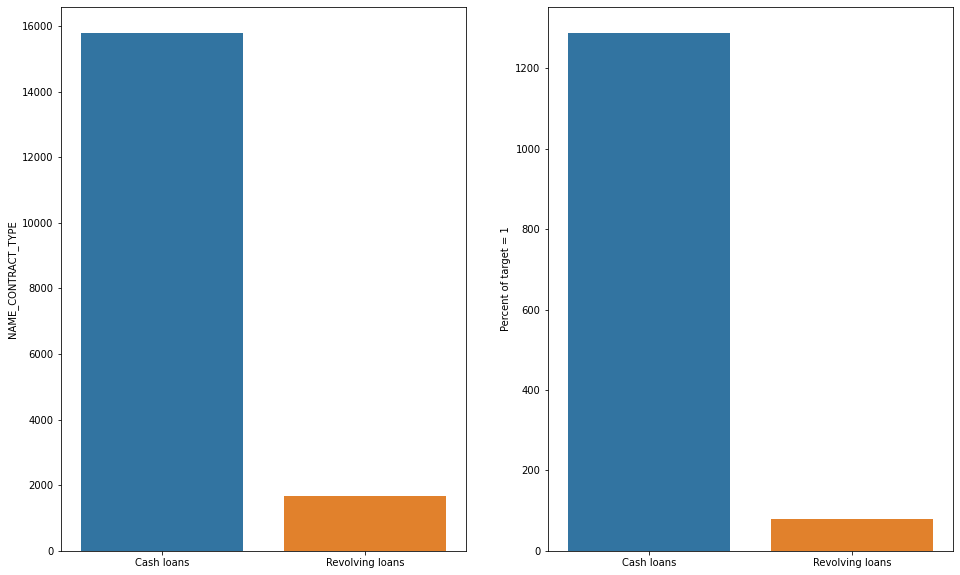

In [ ]:
plotGraph('NAME_CONTRACT_TYPE')

##CODE_GENDER

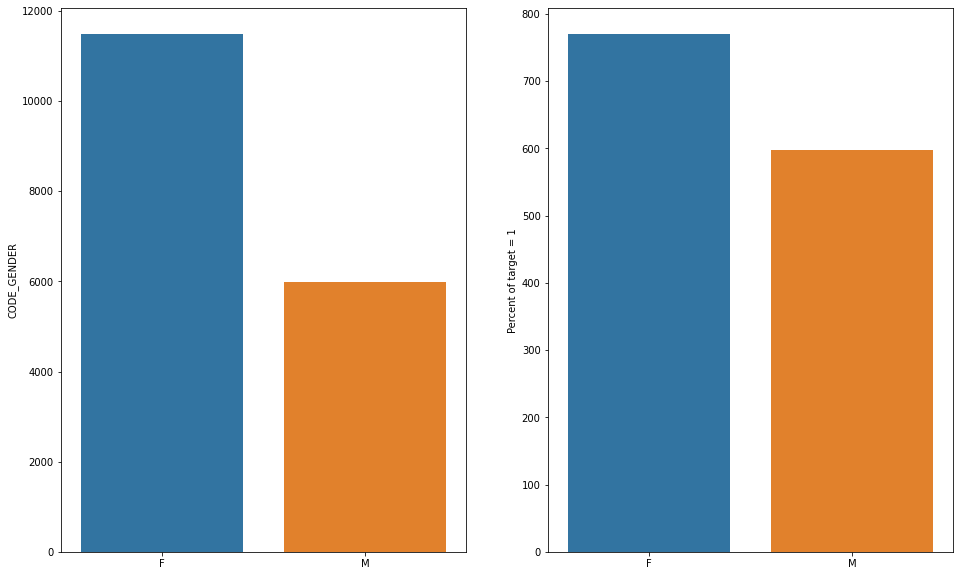

In [ ]:
plotGraph('CODE_GENDER')

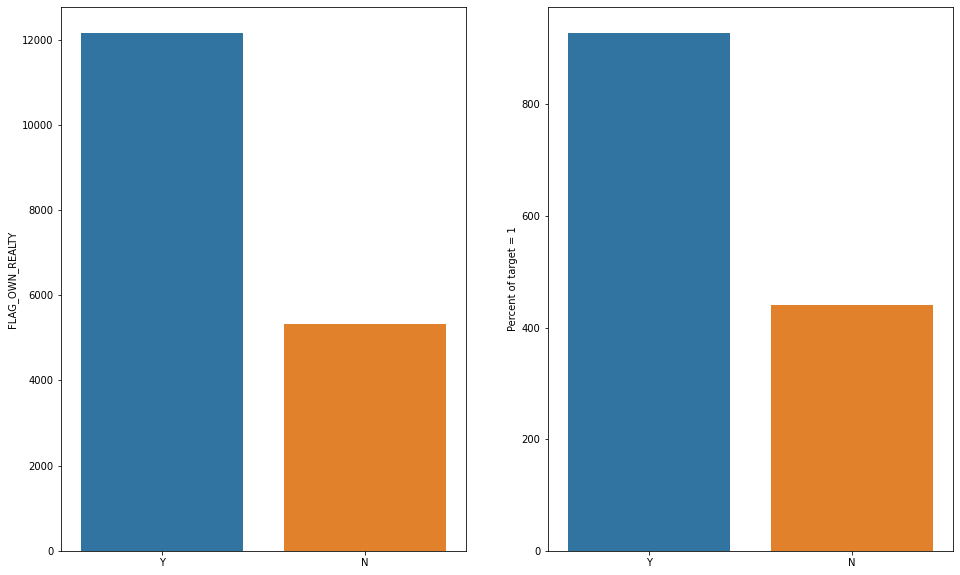

In [ ]:
plotGraph('FLAG_OWN_REALTY')

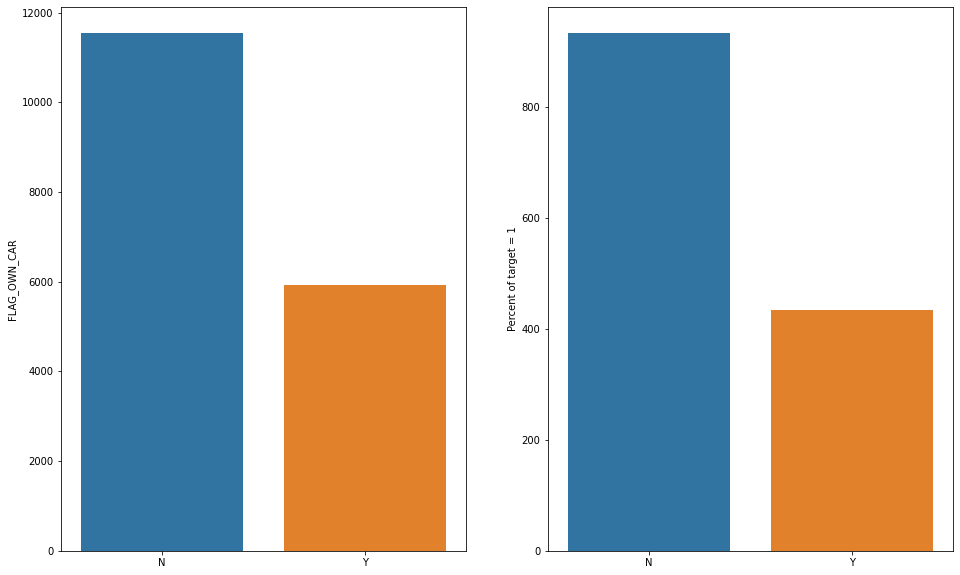

In [ ]:
plotGraph('FLAG_OWN_CAR')

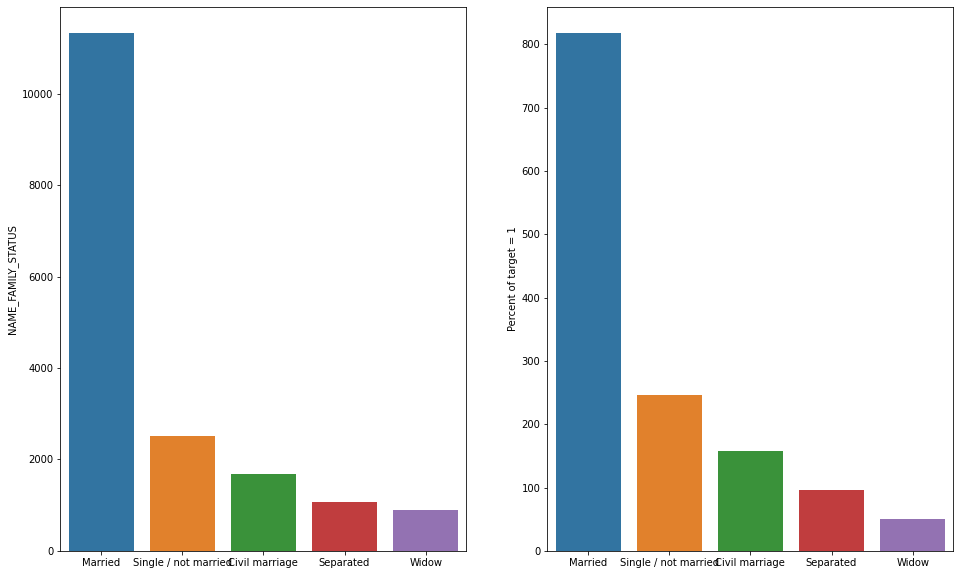

In [ ]:
plotGraph('NAME_FAMILY_STATUS')

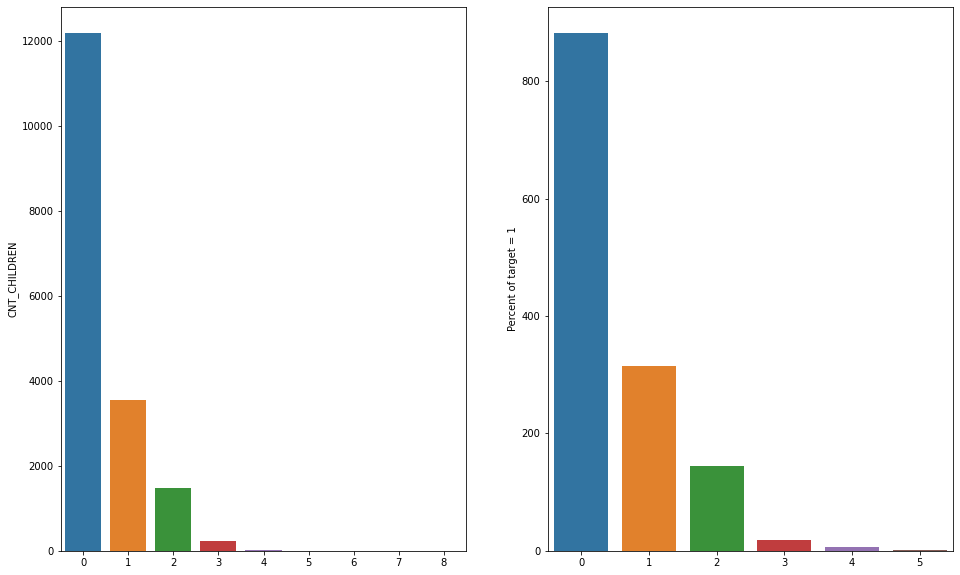

In [ ]:
plotGraph('CNT_CHILDREN')

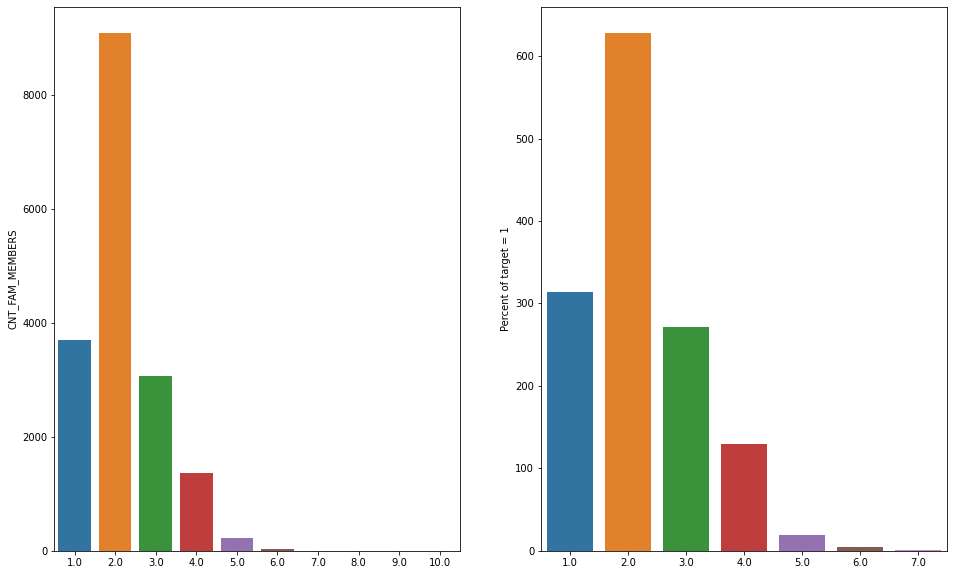

In [ ]:
plotGraph('CNT_FAM_MEMBERS')

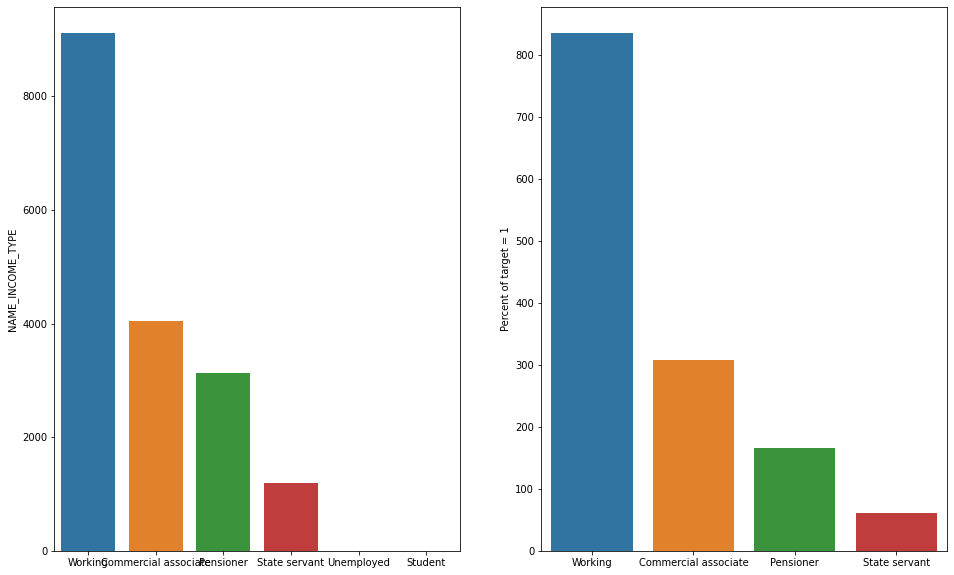

In [ ]:
plotGraph('NAME_INCOME_TYPE')

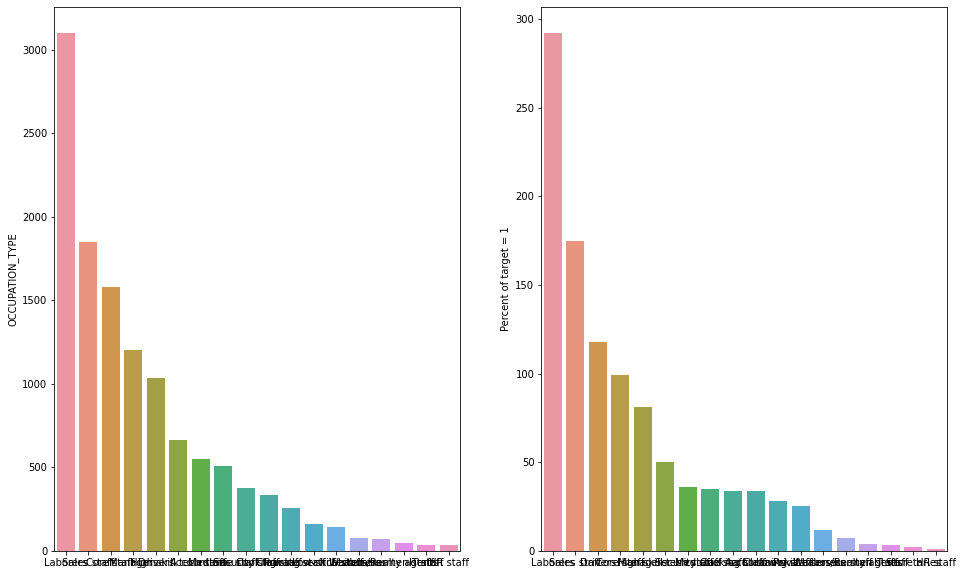

In [ ]:
plotGraph('OCCUPATION_TYPE')

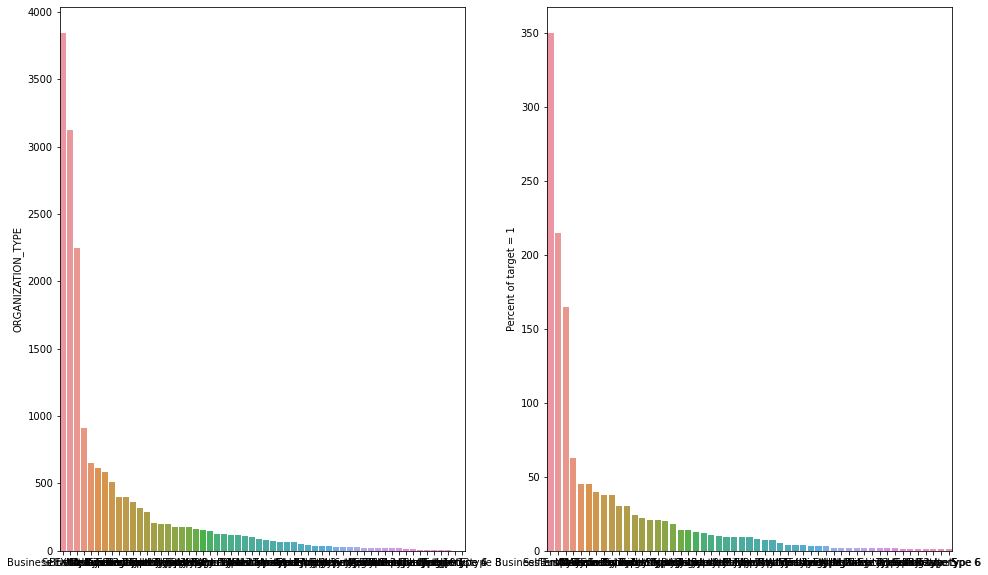

In [ ]:
plotGraph('ORGANIZATION_TYPE')

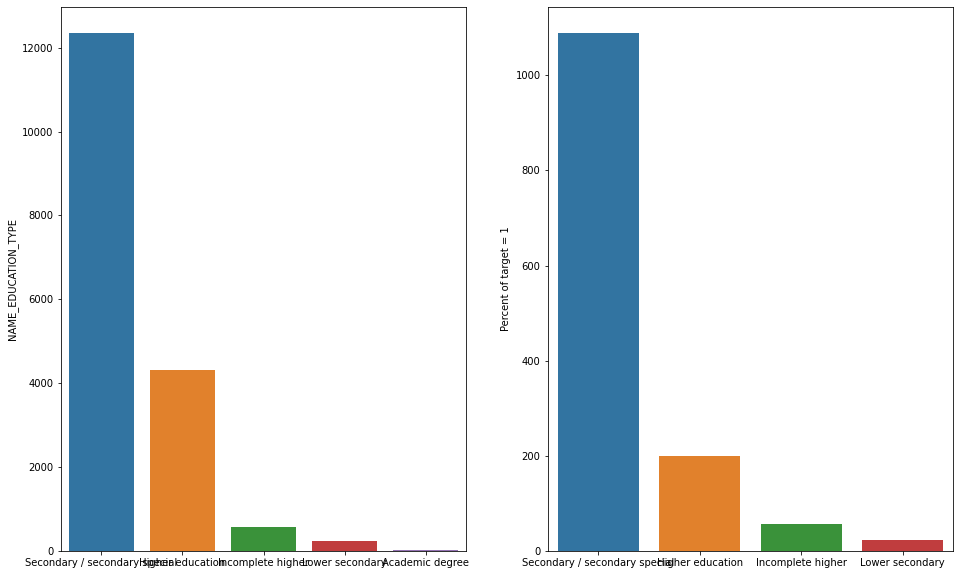

In [ ]:
plotGraph('NAME_EDUCATION_TYPE')

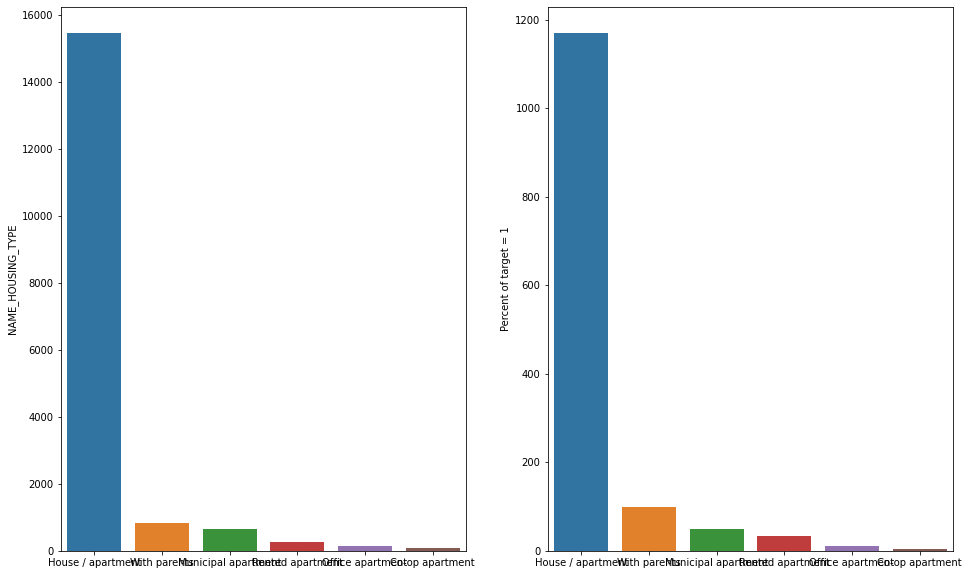

In [ ]:
plotGraph('NAME_HOUSING_TYPE')

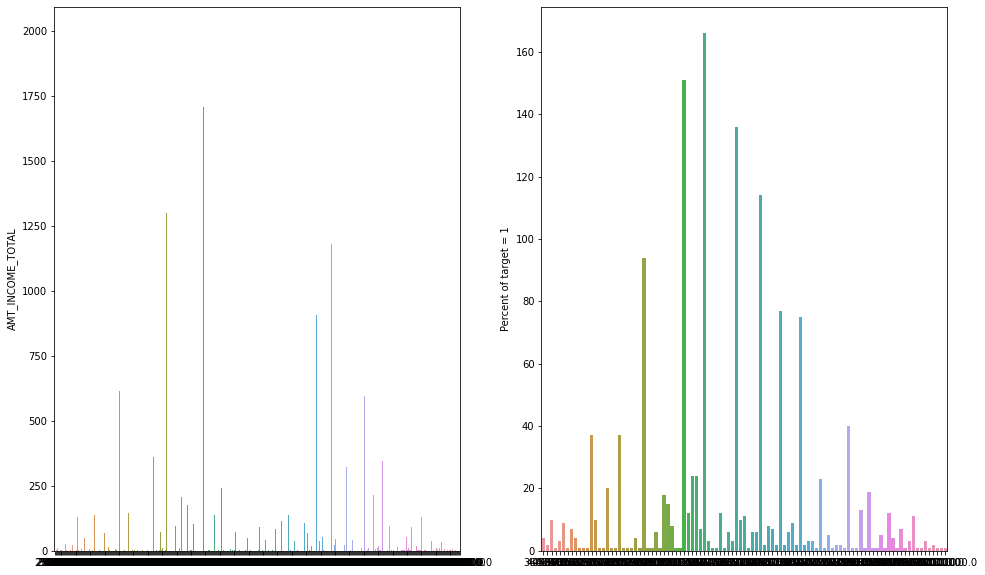

In [ ]:
plotGraph('AMT_INCOME_TOTAL')

In [48]:

corr_matrix = df.corr()

In [ ]:
plt.figure(figsize=(15,15))
# sns.heatmap(corr_matrix)